2.) Build a neural net classifier predicting survival.   The authors did not use a Neural network.

3.) Tune your neural network to optimum performance

4.) Use SHAP and/or ELI5 to determine what variables are most important


5.) For your model, compute all the statistics shown in figure 5 of the paper.    

6.) Discuss how well your model performed relative to the models in the paper.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!pip install openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.5 MB/s eta 0:00:00


In [10]:

infile1= "/content/Norwegian.xlsx"
survivalTraining= pd.read_excel(infile1)

In [11]:
survivalTraining.head()

,Age (years),"Sex (0 male, 1 female)",Length of stay (days),"Hospital outcome (0 alive, 1 dead)",Episode number,ICD-10 1,ICD-10 2,ICD-10 3,ICD-10 4,ICD-10 5,ICD-10 6,ICD-10 7,ICD-10 8,ICD-10 9
0,21,1,1,0,1,,J159,,,,,,,
1,20,1,5,0,1,J158,,,,,,,,
2,21,1,3,0,1,J157,E86,,,,,,,
3,77,0,18,0,1,,J159,,,,,,,
4,72,0,9,0,1,A415,I509,A418,K810,,,,,


"Since the main goal of this study is to predict the survival of the patient, we discarded the length of stay because it strongly relates to the likelihood to survive: the longer the patient has to stay in the hospital, the less likely she/he will survive.

I will do the above after importing the validation data.

In [12]:
infile1= "/content/KoreanPatients.xlsx"
survivalValidation= pd.read_excel(infile1)

In [13]:
survivalValidation.head()

,Number,sex,age,hospital stay,mortality,APACHE II,ASA,Preop shock,postop shock,HTN,...,Albumin-1,Albumin-0,Albumin+1,Albumin+3,Albumin+7,T-bilirubin-1,T-bilirubin-0,T-bilirubin+1,T-bilirubin+3,T-bilirubin+7
0,1,1,18,8,0,NaN,1,0,0,0,...,4.4,3.9,3.6,3.8,NaN,0.9,1.1,1.2,0.8,NaN
1,2,1,20,27,0,12.0,1,0,0,0,...,3.7,2.1,2.9,2.9,2.7,0.9,1.2,0.9,0.6,0.4
2,3,1,20,47,0,NaN,1,1,0,0,...,3.1,1.8,2.7,2.9,3.5,0.3,0.7,0.9,0.5,0.3
3,4,1,21,25,0,14.0,1,0,0,0,...,3.2,3.1,3.2,2.8,3.2,0.3,0.7,1.2,0.7,0.6
4,5,1,22,14,0,NaN,3,0,0,0,...,4.3,2.9,3.3,3.3,3.0,1.2,1.2,1.1,0.7,0.4


In [14]:
survivalValidation.columns

Index(['Number', 'sex', 'age', 'hospital stay', 'mortality', 'APACHE II',
       'ASA', 'Preop shock', 'postop shock', 'HTN', 'DM', 'CRF', 'Pul TBC',
       'malignancy ', 'Diagnosis', 'Location of lesion ', 'surgery type',
       'anastomotic leak', 'infectious', 'wound cx', 'new sepsis', 'pulmonary',
       'AKI', 'ileus', 'blood culture', 'peritoneal fluid culture', 'CRP-1',
       'CRP-0', 'CRP+1', 'CRP+3', 'CRP+7', 'Hb-1', 'Hb-0', 'Hb+1', 'Hb+3',
       'Hb+7', 'Platelet-1', 'Platelet-0', 'Platelet+1', 'Platelet+3',
       'Platelet+7', 'Cholesterol-1', 'Cholesterol-0', 'Cholesterol+1',
       'choleterol+3', 'cholesterol+7', 'Albumin-1', 'Albumin-0', 'Albumin+1',
       'Albumin+3', 'Albumin+7', 'T-bilirubin-1', 'T-bilirubin-0',
       'T-bilirubin+1', 'T-bilirubin+3', 'T-bilirubin+7'],
      dtype='object')

In [15]:
survivalTraining.columns

Index(['Age (years)', 'Sex (0 male, 1 female)', 'Length of stay (days)',
       'Hospital outcome (0 alive, 1 dead)', 'Episode number', 'ICD-10 1',
       'ICD-10 2', 'ICD-10 3', 'ICD-10 4', 'ICD-10 5', 'ICD-10 6', 'ICD-10 7',
       'ICD-10 8', 'ICD-10 9'],
      dtype='object')

In [16]:
survivalTraining['Age (years)']

0         21
1         20
2         21
3         77
4         72
          ..
110199     0
110200     0
110201    70
110202     0
110203     0
Name: Age (years), Length: 110204, dtype: int64

In [17]:
survivalTraining.head()

,Age (years),"Sex (0 male, 1 female)",Length of stay (days),"Hospital outcome (0 alive, 1 dead)",Episode number,ICD-10 1,ICD-10 2,ICD-10 3,ICD-10 4,ICD-10 5,ICD-10 6,ICD-10 7,ICD-10 8,ICD-10 9
0,21,1,1,0,1,,J159,,,,,,,
1,20,1,5,0,1,J158,,,,,,,,
2,21,1,3,0,1,J157,E86,,,,,,,
3,77,0,18,0,1,,J159,,,,,,,
4,72,0,9,0,1,A415,I509,A418,K810,,,,,


I am just going to be working with the Norwegian data because the table I am trying to calculate only uses data from the norwegian data.

In [18]:
survivalTraining['Episode number'].unique()

array([1, 2, 3, 4, 5])

In [19]:
survivalTraining['Sex (0 male, 1 female)'].unique()

array([1, 0])

In [20]:
survivalTraining['Age (years)'].unique()

array([ 21,  20,  77,  72,  83,  74,  69,  53,  82,  75,  45,  56,  46,
        48,  40,  39,  70,  47,  27,  11,  91,   7,  79,  84,  16,  73,
        17,  18,  63,  88,  89,  76,  41,  66,  80,  62,  59,  55,  68,
        33,  71,   8,  58,  78,  51,  43,  44,  60,  86,  61,  67,  57,
        81,  49,  64,  25,  65,  42,  36,  38,  85,  24,  19,  37,  35,
         6,  50,  87,  54,  29,  12,  10,  23,  52,   9,  15,  31,  92,
        28,  30,  13,  94,  90,  26,  32,  95,   5,  93,  34,  96,  22,
        97,  98, 100,  14,   4,  99,   3,   2,   1,   0])

In [21]:
survivalTraining[['Age (years)','Episode number']]

,Age (years),Episode number
0,21,1
1,20,1
2,21,1
3,77,1
4,72,1
...,...,...
110199,0,1
110200,0,1
110201,70,1
110202,0,1


Nothing is missing this is beautiful, I wish it was like this everytime

I am going to use the Sex catagory as is, and stadscale the "Episode number" and "age"

In [22]:
standardizeNeeded= survivalTraining[['Age (years)','Episode number']]

In [23]:
from sklearn.preprocessing import StandardScaler


In [24]:

scaler = StandardScaler()
patientContinuous = scaler.fit_transform(standardizeNeeded)

In [26]:
patientContinuous= pd.DataFrame(patientContinuous,columns=standardizeNeeded.columns)

In [27]:
patientContinuous.head()

,Age (years),Episode number
0,-1.729837,-0.464727
1,-1.771285,-0.464727
2,-1.729837,-0.464727
3,0.591243,-0.464727
4,0.384004,-0.464727


In [28]:
inputVariables = pd.concat([patientContinuous,survivalTraining['Sex (0 male, 1 female)']],axis=1)

In [29]:
inputVariables

,Age (years),Episode number,"Sex (0 male, 1 female)"
0,-1.729837,-0.464727,1
1,-1.771285,-0.464727,1
2,-1.729837,-0.464727,1
3,0.591243,-0.464727,0
4,0.384004,-0.464727,0
...,...,...,...
110199,-2.600242,-0.464727,0
110200,-2.600242,-0.464727,1
110201,0.301108,-0.464727,1
110202,-2.600242,-0.464727,0


In [30]:
y=survivalTraining['Hospital outcome (0 alive, 1 dead)']

# The study cohort for the paper was about 20%

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputVariables, y,train_size=0.8,random_state=1)


Well that may not be what we want as we want to cosider the entire dataset for traning and for testing we need to meet the requrement:
"Accordingly, the final study cohort consisted of cases fulfilling one or several infection or sepsis related ICD-10 codes as well as one or several codes for acute organ dysfunction (Fig 1)."

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0187990#sec005

In [32]:
survivalTraining.head()

,Age (years),"Sex (0 male, 1 female)",Length of stay (days),"Hospital outcome (0 alive, 1 dead)",Episode number,ICD-10 1,ICD-10 2,ICD-10 3,ICD-10 4,ICD-10 5,ICD-10 6,ICD-10 7,ICD-10 8,ICD-10 9
0,21,1,1,0,1,,J159,,,,,,,
1,20,1,5,0,1,J158,,,,,,,,
2,21,1,3,0,1,J157,E86,,,,,,,
3,77,0,18,0,1,,J159,,,,,,,
4,72,0,9,0,1,A415,I509,A418,K810,,,,,


In [33]:
specialRows = survivalTraining[['ICD-10 1','ICD-10 2','ICD-10 3','ICD-10 4','ICD-10 5','ICD-10 6','ICD-10 7','ICD-10 8','ICD-10 9']]== "R65.11"

In [34]:
specialRows.any().unique()

array([False])

I give up trying to figure out how they came up with a study cohort I don't know what the code for organ failiure is.

#Nural Net

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, batch_size=int(min(200/2, inputVariables.shape[0]/2)),max_iter=50000,hidden_layer_sizes=(50,25,25,), verbose=True, warm_start=False)

clf.fit(inputVariables,y)
y_pred=clf.predict(inputVariables)

Iteration 1, loss = 0.25543784
Iteration 2, loss = 0.24331635
Iteration 3, loss = 0.24355247
Iteration 4, loss = 0.24318582
Iteration 5, loss = 0.24319076
Iteration 6, loss = 0.24313068
Iteration 7, loss = 0.24311207
Iteration 8, loss = 0.24295093
Iteration 9, loss = 0.24292323
Iteration 10, loss = 0.24290145
Iteration 11, loss = 0.24294107
Iteration 12, loss = 0.24292504
Iteration 13, loss = 0.24274989
Iteration 14, loss = 0.24282288
Iteration 15, loss = 0.24274346
Iteration 16, loss = 0.24279943
Iteration 17, loss = 0.24278841
Iteration 18, loss = 0.24267316
Iteration 19, loss = 0.24268904
Iteration 20, loss = 0.24266828
Iteration 21, loss = 0.24280792
Iteration 22, loss = 0.24267014
Iteration 23, loss = 0.24263976
Iteration 24, loss = 0.24267503
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [38]:
from sklearn.metrics import r2_score
clf.score(inputVariables, y
          )

0.9264545751515372

In [39]:
sum(y_pred)

0

yay they are all dead, NO!

In [40]:
myTest =  pd.concat([patientContinuous,survivalTraining['Sex (0 male, 1 female)'],y],axis=1)

In [41]:
theDead =myTest[myTest['Hospital outcome (0 alive, 1 dead)'] == 1]

In [42]:
theAlive = myTest[myTest['Hospital outcome (0 alive, 1 dead)'] == 0]

In [43]:
theAliveSubset = theAlive.sample(n = (int(8105*1.5)))

In [44]:
int(8105*1.5)

12157

In [45]:
len(theDead)

8105

In [46]:
newTrain = pd.concat([theAliveSubset,theDead])

In [47]:
newTrain

,Age (years),Episode number,"Sex (0 male, 1 female)","Hospital outcome (0 alive, 1 dead)"
7175,0.010973,0.865423,0,0
3005,0.881378,-0.464727,0,0
33587,0.466900,-0.464727,0,0
44920,0.176765,-0.464727,0,0
83741,-1.356806,-0.464727,0,0
...,...,...,...,...
110072,-0.030475,-0.464727,1,1
110079,1.005722,-0.464727,0,1
110113,0.632691,-0.464727,1,1
110174,0.301108,-0.464727,0,1


In [48]:
newTrainInput = newTrain.drop(['Hospital outcome (0 alive, 1 dead)'], axis=1)

In [49]:
newY = newTrain['Hospital outcome (0 alive, 1 dead)']

In [50]:
newY

7175      0
3005      0
33587     0
44920     0
83741     0
         ..
110072    1
110079    1
110113    1
110174    1
110198    1
Name: Hospital outcome (0 alive, 1 dead), Length: 20262, dtype: int64

In [51]:
clf2 = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, batch_size=int(min(200/2, newTrainInput.shape[0]/2)),max_iter=50000,hidden_layer_sizes=(50,25,25,), verbose=True, warm_start=False)

clf2.fit(newTrainInput,newY)
y_pred2=clf2.predict(newTrainInput)

Iteration 1, loss = 0.61107699
Iteration 2, loss = 0.59701484
Iteration 3, loss = 0.59614428
Iteration 4, loss = 0.59573982
Iteration 5, loss = 0.59606167
Iteration 6, loss = 0.59560472
Iteration 7, loss = 0.59525577
Iteration 8, loss = 0.59515154
Iteration 9, loss = 0.59524079
Iteration 10, loss = 0.59529436
Iteration 11, loss = 0.59487018
Iteration 12, loss = 0.59491423
Iteration 13, loss = 0.59515139
Iteration 14, loss = 0.59585180
Iteration 15, loss = 0.59507209
Iteration 16, loss = 0.59497532
Iteration 17, loss = 0.59471753
Iteration 18, loss = 0.59489495
Iteration 19, loss = 0.59465705
Iteration 20, loss = 0.59477607
Iteration 21, loss = 0.59445974
Iteration 22, loss = 0.59478782
Iteration 23, loss = 0.59463506
Iteration 24, loss = 0.59457197
Iteration 25, loss = 0.59491778
Iteration 26, loss = 0.59468306
Iteration 27, loss = 0.59458072
Iteration 28, loss = 0.59461978
Iteration 29, loss = 0.59487817
Iteration 30, loss = 0.59461193
Iteration 31, loss = 0.59442478
Iteration 32, los

In [52]:
sum(y_pred2)

6816

In [53]:
sum(y_pred2)/sum(newY) #mmmmmmmm lets see if I improve from the 1x dead

0.8409623689080814

In [54]:
# Lets try 1.5x the dead.
sum(y_pred2)/sum(newY)

0.8409623689080814

In [55]:
#seems like a sweet spot here.

In [56]:
len(newTrainInput)

20262

score(X, y[, sample_weight])

Return the mean accuracy on the given test data and labels.

first Try lets do better

In [57]:
clf2.score(newTrainInput, newY)

0.6543776527489883

#Second try 75% at 3x the the rate of alive then dead lets try 4x the alive.

In [58]:
clf2.score(newTrainInput, newY)

0.6543776527489883

4x The alive

In [59]:
clf2.score(newTrainInput, newY)

0.6543776527489883

#Even better at 4x the alive, lets try 5x

In [60]:
clf2.score(newTrainInput, newY)

0.6543776527489883

5x is slightly better what about 6x.

In [61]:
clf2.score(newTrainInput, newY)

0.6543776527489883

In [62]:
#7x
clf2.score(newTrainInput, newY)

0.6543776527489883

In [63]:
#8x
clf2.score(newTrainInput, newY)

0.6543776527489883

In [64]:
newTrainInput

,Age (years),Episode number,"Sex (0 male, 1 female)"
7175,0.010973,0.865423,0
3005,0.881378,-0.464727,0
33587,0.466900,-0.464727,0
44920,0.176765,-0.464727,0
83741,-1.356806,-0.464727,0
...,...,...,...
110072,-0.030475,-0.464727,1
110079,1.005722,-0.464727,0
110113,0.632691,-0.464727,1
110174,0.301108,-0.464727,0


In [65]:
inputVariables

,Age (years),Episode number,"Sex (0 male, 1 female)"
0,-1.729837,-0.464727,1
1,-1.771285,-0.464727,1
2,-1.729837,-0.464727,1
3,0.591243,-0.464727,0
4,0.384004,-0.464727,0
...,...,...,...
110199,-2.600242,-0.464727,0
110200,-2.600242,-0.464727,1
110201,0.301108,-0.464727,1
110202,-2.600242,-0.464727,0


In [66]:
#Ok lets try this model on the whole set.
clf2.score(inputVariables.drop(['Sex (0 male, 1 female)'], axis=1), y)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Sex (0 male, 1 female)


In [67]:
#1.x on whole set
clf2.score(inputVariables, y)

0.7398914739936845

In [68]:
#I will go with this

# The accuracy increases as we increase the amount of dead but it doesn't predict anyone died.

#Use SHAP and/or ELI5 to determine what variables are most important

In [69]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.0 MB/s eta 0:00:00


In [70]:
import shap

In [71]:
explainer = shap.PermutationExplainer(clf2.predict,newTrainInput)

In [72]:
shap_values = explainer.shap_values(newTrainInput)

PermutationExplainer explainer: 20263it [05:02, 65.29it/s]                           


In [73]:
features=newTrainInput.columns

In [74]:
shap_values

array([[-0.4025 ,  0.02375,  0.04875],
       [ 0.38375,  0.0025 ,  0.28375],
       [-0.315  , -0.09   ,  0.075  ],
       ...,
       [-0.035  ,  0.0075 , -0.3025 ],
       [-0.37125, -0.00125,  0.0425 ],
       [-0.28125,  0.00125, -0.05   ]])

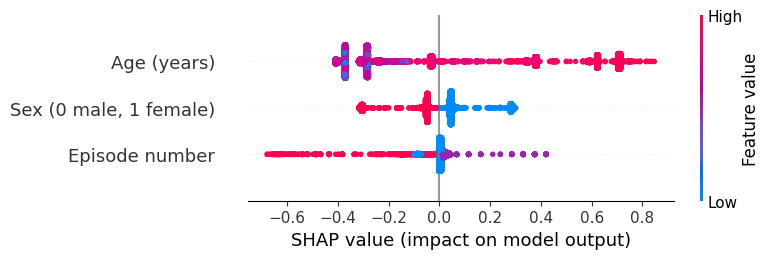

In [75]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))

shap.summary_plot(shap_values,newTrainInput,feature_names=features)

Low episode number has no impact on shap, midium episode numbers has positive impact and high episode number has negative.

Sex: low: positive impace, high: negative impact
Age: High age has postive impact on shap while modeterate and low age has negative impact.

For your model, compute all the statistics shown in figure 5 of the paper.

PR AUC

In [76]:
from sklearn import metrics

In [77]:
from sklearn.metrics import precision_recall_curve, auc

In [78]:
newY=np.array(newY)

In [79]:
len(y_pred2)

20262

In [81]:
precision, recall,_= precision_recall_curve(newY, y_pred2)

In [80]:
precision, recall,_= precision_recall_curve(newY, y_pred2)
pr_auc = auc(recall, precision)

In [82]:
print("PR-AUC Score:", pr_auc)

PR-AUC Score: 0.6369612988968295


In [83]:
#ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(newY, y_pred2)

0.6267276370833437

In [84]:
#TP rate

In [85]:
confusion_matrix = metrics.confusion_matrix(newY, y_pred2)

In [86]:
from sklearn.metrics import precision_score

TP = np.diag(confusion_matrix)

In [87]:
confusion_matrix

array([[9300, 2857],
       [4146, 3959]])

In [88]:
sum(sum(confusion_matrix))

20262

In [89]:
sum(TP)/sum(sum(confusion_matrix))

0.6543776527489883

In [90]:
#TN rate
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TN = confusion_matrix.sum().sum() - (FP+ FN + TP)


In [91]:
TNR = TN/(TN+FP)

In [92]:
confusion_matrix[1][1]/confusion_matrix.sum()

0.19539038594413188

In [93]:
#	PPV
#true pos/ tru pos + false pos
confusion_matrix[0][0]/confusion_matrix[0].sum()

0.7649913630007403

In [94]:
#NPV
#true neg/ tru neg + false neg

confusion_matrix[1][1]/confusion_matrix[1].sum()

0.48846391116594695

In [95]:
#MCC
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(newY, y_pred2)


0.26280262963747447

In [96]:
#F_1 score
from sklearn.metrics import f1_score
f1_score(newY, y_pred2)

0.5306614838147576

In [97]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(newY, y_pred2)

0.6543776527489883


My model would be alomost perfect if I used the whole data to train my model becuase it preditcs that everyone is alive. But I used a subset where I got a buch of dead ones and a bunch of alive ones and trained on those.

PR-AUC Score: 0.6547867558456871 all of his models on the study cohort and the primary cohort does better.
Roc AUC : 0.6405040835009896 mine does better on the selected subset of data for some of rows and columns in table 5 such as gradient boosting for the study cohort.
Tp rate: 0.6551179547922219 mine has higher rate except linear regression and gradient boosting.

TN rate: 0.22697660645543383 gradient boosting bosting in the study chort is the only one with a lower rate.


PPV:0.7135806531216583 worse than all his models for both study and primary.

NPV:0.5674275138803208 my NPV is better at detecting negatives.


MCC:0.28114776476327313
Mine is better than all of his as it is higher.

F_1 score:0.5682688743358458

This is lower than all of them exept linear svm. So it's worse based on this metric so it's only better than linear SVM in terms of correction.

accuracy:0.6551179547922219

Linear SVM , RADICAL SVM and Naive bayes are the only ones that does worse everything else is more accurate for both the study and primary cohort.
```
# This is formatted as code
```



In [98]:
# Over Sampling

In [100]:
infile1= "/content/s41598-020-73558-3_sepsis_survival_primary_cohort.csv"
survivalTraining= pd.read_csv(infile1)

In [101]:
survivalTraining.head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


In [102]:
X = survivalTraining[['age_years','sex_0male_1female','episode_number']]
y = survivalTraining[['hospital_outcome_1alive_0dead']]

In [103]:
X.head()

,age_years,sex_0male_1female,episode_number
0,21,1,1
1,20,1,1
2,21,1,1
3,77,0,1
4,72,0,1


In [104]:
X

,age_years,sex_0male_1female,episode_number
0,21,1,1
1,20,1,1
2,21,1,1
3,77,0,1
4,72,0,1
...,...,...,...
110199,0,0,1
110200,0,1,1
110201,70,1,1
110202,0,0,1


In [105]:
y.head()

,hospital_outcome_1alive_0dead
0,1
1,1
2,1
3,1
4,1


In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
X_res_standardize = X[['age_years','episode_number']]

In [108]:
scaler = StandardScaler()
X_res_standardized = scaler.fit_transform(X_res_standardize)

In [109]:
X_res_standardized

array([[-1.72983711, -0.4647268 ],
       [-1.77128498, -0.4647268 ],
       [-1.72983711, -0.4647268 ],
       ...,
       [ 0.30110817, -0.4647268 ],
       [-2.60024224, -0.4647268 ],
       [-2.60024224, -0.4647268 ]])

In [110]:
X_resContinuous= pd.DataFrame(X_res_standardized,columns=X_res_standardize.columns)

In [111]:
X = pd.concat([X_resContinuous,X['sex_0male_1female']],axis=1)

In [112]:
X.shape

(110204, 3)

In [113]:
X

,age_years,episode_number,sex_0male_1female
0,-1.729837,-0.464727,1
1,-1.771285,-0.464727,1
2,-1.729837,-0.464727,1
3,0.591243,-0.464727,0
4,0.384004,-0.464727,0
...,...,...,...
110199,-2.600242,-0.464727,0
110200,-2.600242,-0.464727,1
110201,0.301108,-0.464727,1
110202,-2.600242,-0.464727,0


In [121]:
y.shape

(110204, 1)

In [122]:
!pip install imblearn

#OverSampler

In [124]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_res, y_res = ros.fit_resample(X, y)

In [125]:
from sklearn.neural_network import MLPClassifier
clfOver = MLPClassifier(solver='adam', alpha=1e-5, learning_rate_init=0.0001,random_state=1, batch_size=int(min(200/2, X_res.shape[0]/2)),max_iter=50000,hidden_layer_sizes=(50,25,25,), verbose=True, warm_start=False)

clfOver.fit(X_res,y_res)
y_pred1=clfOver.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.62440370
Iteration 2, loss = 0.61262634
Iteration 3, loss = 0.61222392
Iteration 4, loss = 0.61191425
Iteration 5, loss = 0.61176378
Iteration 6, loss = 0.61158251
Iteration 7, loss = 0.61150116
Iteration 8, loss = 0.61139142
Iteration 9, loss = 0.61131328
Iteration 10, loss = 0.61126484
Iteration 11, loss = 0.61122470
Iteration 12, loss = 0.61115343
Iteration 13, loss = 0.61110867
Iteration 14, loss = 0.61105682
Iteration 15, loss = 0.61103529
Iteration 16, loss = 0.61097922
Iteration 17, loss = 0.61098345
Iteration 18, loss = 0.61089644
Iteration 19, loss = 0.61087681
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [126]:
clfOver.score(X, y)

0.5786087619324163

In [127]:
X_res.head()

,age_years,episode_number,sex_0male_1female
0,-1.729837,-0.464727,1
1,-1.771285,-0.464727,1
2,-1.729837,-0.464727,1
3,0.591243,-0.464727,0
4,0.384004,-0.464727,0


In [128]:
from sklearn.metrics import f1_score
f1_score(y, y_pred1)

0.713429722741606

It has an accuracy of 65%

#4 Main approahes of dealing with imbalance data and their explanations:

        a.)  Oversampling the minority

Randomly choose samples of the minority class and repeat or duplicate them. This is also called random oversampling with replacement.



        b.) Undersampling the majority

In Random UnderSampling (RUS), as the name suggests, we randomly extract observations from the majority class until the classes are balanced.


        c.) SMOTE oversampling the minority

Synthetic minority oversampling teqnique sholves the problem of duplicate values in the minority random oversampling. What it does is uses multiple values in the minority class to create new unique values similar to the ones in the minority class.

        d.) Weighting the majority and minority differently.

Class weights are inverserly proportional to class frequency, the more frequently classes are weighted less and then frequently occuring ones.

#SMOTE

In [129]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X, y)

In [130]:
X_res.shape

(204198, 3)

In [131]:
X.shape

(110204, 3)

In [132]:
from sklearn.neural_network import MLPClassifier
clfSMOTE = MLPClassifier(solver='adam', alpha=1e-5,learning_rate_init=0.0001, random_state=1, batch_size=int(min(200/2, X_res.shape[0]/2)),max_iter=50000,hidden_layer_sizes=(50,25,25,), verbose=True, warm_start=False)

clfSMOTE.fit(X_res,y_res)
y_pred=clfSMOTE.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.62383711
Iteration 2, loss = 0.61140617
Iteration 3, loss = 0.61101071
Iteration 4, loss = 0.61073943
Iteration 5, loss = 0.61060091
Iteration 6, loss = 0.61045213
Iteration 7, loss = 0.61035684
Iteration 8, loss = 0.61024569
Iteration 9, loss = 0.61017016
Iteration 10, loss = 0.61014502
Iteration 11, loss = 0.61009227
Iteration 12, loss = 0.61002335
Iteration 13, loss = 0.61001540
Iteration 14, loss = 0.60994937
Iteration 15, loss = 0.60991018
Iteration 16, loss = 0.60986511
Iteration 17, loss = 0.60985941
Iteration 18, loss = 0.60980755
Iteration 19, loss = 0.60975431
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [133]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.7073051172430055

In [134]:
clfSMOTE.score(X, y)

0.5719665347900258

#ADASYN

In [135]:
from imblearn.over_sampling import ADASYN
X_resampled, y_resampled = ADASYN().fit_resample(X, y)

In [136]:
from sklearn.neural_network import MLPClassifier
clfADASYN = MLPClassifier(solver='adam', alpha=1e-5,learning_rate_init=0.0001, random_state=1, batch_size=int(min(200/2, X_res.shape[0]/2)),max_iter=50000,hidden_layer_sizes=(50,25,25,), verbose=True, warm_start=False)

clfADASYN.fit(X_res,y_res)
y_pred3=clfADASYN.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.62383711
Iteration 2, loss = 0.61140617
Iteration 3, loss = 0.61101071
Iteration 4, loss = 0.61073943
Iteration 5, loss = 0.61060091
Iteration 6, loss = 0.61045213
Iteration 7, loss = 0.61035684
Iteration 8, loss = 0.61024569
Iteration 9, loss = 0.61017016
Iteration 10, loss = 0.61014502
Iteration 11, loss = 0.61009227
Iteration 12, loss = 0.61002335
Iteration 13, loss = 0.61001540
Iteration 14, loss = 0.60994937
Iteration 15, loss = 0.60991018
Iteration 16, loss = 0.60986511
Iteration 17, loss = 0.60985941
Iteration 18, loss = 0.60980755
Iteration 19, loss = 0.60975431
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [137]:
clfADASYN.score(X, y)

0.5719665347900258

In [138]:
clfADASYN.score(X, y)

0.5719665347900258

In [139]:
sum(y_pred)

59062

In [140]:
from sklearn.metrics import f1_score
f1_score(y, y_pred3)

0.7073051172430055

#Class Weighting

In [141]:
import tensorflow as tf
from tensorflow import keras

In [142]:
METRICS = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [143]:
def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          50, activation='relu',
          input_shape=(X.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(25, activation='relu'),
      keras.layers.Dense(25, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [144]:
weighted_model = make_model()

EPOCHS = 100
BATCH_SIZE = 2048
pos = 102099
neg = len(y)-pos
total = neg + pos
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}
weighted_history = weighted_model.fit(
    X,
    y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    # The class weights go here
    class_weight=class_weight)

Epoch 1/100
54/54 [==============================] - 2s 5ms/step - loss: 0.6830 - cross entropy: 0.5249 - Brier score: 0.1705 - tp: 93138.0000 - fp: 6904.0000 - tn: 1201.0000 - fn: 8961.0000 - accuracy: 0.8560 - precision: 0.9310 - recall: 0.9122 - auc: 0.6278 - prc: 0.9561
Epoch 2/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6267 - cross entropy: 0.6175 - Brier score: 0.2224 - tp: 52281.0000 - fp: 1905.0000 - tn: 6200.0000 - fn: 49818.0000 - accuracy: 0.5307 - precision: 0.9648 - recall: 0.5121 - auc: 0.6823 - prc: 0.9653
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6216 - cross entropy: 0.6233 - Brier score: 0.2244 - tp: 53306.0000 - fp: 1874.0000 - tn: 6231.0000 - fn: 48793.0000 - accuracy: 0.5402 - precision: 0.9660 - recall: 0.5221 - auc: 0.6918 - prc: 0.9664
Epoch 4/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6201 - cross entropy: 0.6252 - Brier score: 0.2254 - tp: 52921.0000 - fp: 1817.0000 - tn: 6288.000

In [145]:
sum(np.array(y))

array([102099])

In [146]:
ypred4 = weighted_model.predict(X)

3444/3444 [==============================] - 3s 943us/step


In [147]:
ypred4_corr=[]

for ch in ypred4:
  if ch>.5:
    ypred4_corr.append(1)
  else:
    ypred4_corr.append(0)

In [148]:
ypred4_corr

[1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,


In [149]:
type(y)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.metrics import f1_score
f1_score(y, ypred4_corr)

0.733585445377744

# Undersampling the majority

In [150]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_res, y_res = rus.fit_resample(X, y)

In [152]:
from sklearn.neural_network import MLPClassifier
clfOver = MLPClassifier(solver='adam', alpha=1e-5, learning_rate_init=0.0001,random_state=1, batch_size=int(min(200/2, X_res.shape[0]/2)),max_iter=50000,hidden_layer_sizes=(50,25,25,), verbose=True, warm_start=False)

clfOver.fit(X_res,y_res)
y_pred2=clfOver.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.69329853
Iteration 2, loss = 0.65800511
Iteration 3, loss = 0.63284669
Iteration 4, loss = 0.62037350
Iteration 5, loss = 0.61695630
Iteration 6, loss = 0.61640464
Iteration 7, loss = 0.61604539
Iteration 8, loss = 0.61589031
Iteration 9, loss = 0.61563148
Iteration 10, loss = 0.61550519
Iteration 11, loss = 0.61539942
Iteration 12, loss = 0.61533314
Iteration 13, loss = 0.61519861
Iteration 14, loss = 0.61509969
Iteration 15, loss = 0.61502198
Iteration 16, loss = 0.61499287
Iteration 17, loss = 0.61489413
Iteration 18, loss = 0.61481676
Iteration 19, loss = 0.61472776
Iteration 20, loss = 0.61477141
Iteration 21, loss = 0.61464495
Iteration 22, loss = 0.61469753
Iteration 23, loss = 0.61451511
Iteration 24, loss = 0.61452235
Iteration 25, loss = 0.61450783
Iteration 26, loss = 0.61442601
Iteration 27, loss = 0.61439124
Iteration 28, loss = 0.61441408
Iteration 29, loss = 0.61435053
Iteration 30, loss = 0.61432863
Iteration 31, loss = 0.61432097
Iteration 32, los

In [153]:
from sklearn.metrics import f1_score
f1_score(y, y_pred2)

0.7030460804523968

The weighitng model with keras worked the best with an f1 score of .73.